In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data = pd.read_csv('./input/GSAF5.csv', encoding = "ISO-8859-1") #importa los datos csv
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
null_cols = data.isnull().sum() # especifica que campos de cada columna son nulos
#null_cols[null_cols > 0]
null_cols

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [4]:
data = data.rename(columns={'Sex ':'Sex', 'Fatal (Y/N)': 'Fatal', 'Species ' : 'Species',
                            'href formula' : 'URL ref', 'Case Number.1' : 'Case 1', 'Case Number.2' : 'Case 2'})
#renombramos columnas                
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,URL ref,href,Case 1,Case 2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [5]:
data = data.drop(['Unnamed: 22','Unnamed: 23','href','pdf'], 1) #elimina las filas Unnamed: 22,Unnamed: 23, href, pdf
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,URL ref,Case 1,Case 2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [6]:
data['Species'] = data[['Species']].fillna('shark_unknown') #cambia las 'NaN' por 'shark'
data['Time'] = data[['Time']].fillna('unknown') 
data['Location'] = data[['Location']].fillna('No location') 
data['Country'] = data[['Country']].fillna('unknown')
data['Area'] = data[['Area']].fillna('unknown')
data['Activity'] = data[['Activity']].fillna('unknown')
data['Name'] = data[['Name']].fillna('unknown')
data['Age'] = data[['Age']].fillna('unknown')
data['Injury'] = data[['Injury']].fillna('unknown')
data['Fatal'] = data[['Fatal']].fillna('unknown')
data['Investigator or Source'] = data[['Investigator or Source']].fillna('unknown')

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,URL ref,Case 1,Case 2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,unknown,Struck by fin on chest & leg,N,unknown,shark_unknown,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,unknown,No injury: Knocked off board by shark,N,unknown,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


M    4835
F     585
Name: Sex, dtype: int64

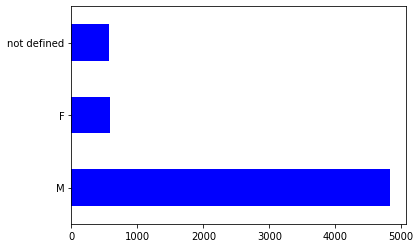

In [27]:
gender = data['Sex'].value_counts() #saca lista total de suma de elementos
gender[gender>2].plot.barh(color='blue')
gender.head(2)
#print("Numero de muertes masculinas y femeninas {}".format(sex_vals[:2]))

In [8]:
#from genders import type_of_gender
#print(type_of_gender('Sex'))
def type_of_gender(sex):  #funcion para dar una definicion a los NaN
    if sex == 'M' or sex == 'F':
        return sex
    else:
        return 'not defined'
#print(type_of_gender('Sex'))
data['Sex'] = data['Sex'].apply(type_of_gender)
data['Sex'].head(15)

0               M
1               M
2               M
3               M
4               M
5     not defined
6               M
7               F
8               M
9               F
10              M
11              M
12              M
13              M
14              M
Name: Sex, dtype: object

In [9]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,URL ref,Case 1,Case 2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,unknown,Struck by fin on chest & leg,N,unknown,shark_unknown,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,unknown,No injury: Knocked off board by shark,N,unknown,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [10]:
#limpia = list(data['Case Number'])
#limpieza = []
#for e in limpia:
 #   limpieza.append(e)
#print(limpieza)


In [11]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'URL ref', 'Case 1', 'Case 2',
       'original order'],
      dtype='object')

In [12]:
data['Case Number'] = data['Case Number'].str.extract(r'^(\d{4}.\d{2}.\d{2})', expand=False) #limpiamos la fecha de 'Case Number'
data['Case Number'].head(10)

0    2016.09.18
1    2016.09.18
2    2016.09.18
3    2016.09.17
4    2016.09.15
5    2016.09.15
6    2016.09.11
7    2016.09.07
8    2016.09.06
9    2016.09.05
Name: Case Number, dtype: object

In [13]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,URL ref,Case 1,Case 2,original order
0,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,unknown,Struck by fin on chest & leg,N,unknown,shark_unknown,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,unknown,No injury: Knocked off board by shark,N,unknown,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [14]:
data['Case 1'] = data['Case 1'].str.extract(r'^(\d{4}.\d{2}.\d{2})', expand=False)#limpiamos la fecha de 'Case Number 'Case 1'
data['Case 2'] = data['Case 2'].str.extract(r'^(\d{4}.\d{2}.\d{2})', expand=False)#limpiamos la fecha de 'Case Number 'Case 2'
data['Case 1'].head(5)

0    2016.09.18
1    2016.09.18
2    2016.09.18
3    2016.09.17
4    2016.09.16
Name: Case 1, dtype: object

In [15]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,URL ref,Case 1,Case 2,original order
0,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18,2016.09.18,5993
1,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18,2016.09.18,5992
2,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18,2016.09.18,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,unknown,Struck by fin on chest & leg,N,unknown,shark_unknown,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,unknown,No injury: Knocked off board by shark,N,unknown,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [16]:
data.count()

Case Number               5868
Date                      5992
Year                      5992
Type                      5992
Country                   5992
Area                      5992
Location                  5992
Activity                  5992
Name                      5992
Sex                       5992
Age                       5992
Injury                    5992
Fatal                     5992
Time                      5992
Species                   5992
Investigator or Source    5992
URL ref                   5991
Case 1                    5868
Case 2                    5868
original order            5992
dtype: int64

In [17]:
data.describe() #información de los principales indicadores estadísticos 

,Year,original order
count,5992.000000,5992.000000
mean,1925.204606,2997.548899
std,286.473712,1729.860210
min,0.000000,2.000000
25%,1942.000000,1499.750000
50%,1975.000000,2997.500000
75%,2003.000000,4495.250000
max,2016.000000,5993.000000


In [31]:
pd.crosstab(data.Sex, data.Country) #Aqui sacamos la relaccion de numeros mujeres/hombres muertos en relacción a los paises


Country,PHILIPPINES,TONGA,ADMIRALTY ISLANDS,ALGERIA,AMERICAN SAMOA,ANDAMAN / NICOBAR ISLANDAS,ANGOLA,ANTIGUA,ARGENTINA,ARUBA,...,UNITED KINGDOM,URUGUAY,USA,VANUATU,VENEZUELA,VIETNAM,WESTERN SAMOA,YEMEN,YEMEN,unknown
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,0,0,0,0,0,0,...,0,0,308,4,0,4,0,1,0,3
M,1,3,1,1,3,1,1,1,1,1,...,9,2,1706,9,11,10,1,0,6,37
not defined,0,0,0,0,0,0,0,0,0,0,...,1,1,102,1,0,0,0,1,1,3


In [19]:
data_group = data.groupby(['Activity', 'Sex'])['Country'].sum()#crea un grupo en el que relacciona actividad y sexo con el pais
data_group

Activity                                                                    Sex        
                                                                            not defined                                                  USA
                                                                            M                                                  CARIBBEAN SEA
 a canoe was pursuing a schooner that had forcibily abducted 5 young girls  M                                                  PACIFIC OCEAN
"Boat accident"                                                             M                                                    NEW ZEALAND
"Climbing up to ship after repairing the stern in water"                    M                                     ANDAMAN / NICOBAR ISLANDAS
                                                                                                                 ...                        
unknown                                                           

In [20]:
import matplotlib.pyplot as plt

In [21]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,URL ref,Case 1,Case 2,original order
0,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18,2016.09.18,5993
1,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18,2016.09.18,5992
2,2016.09.18,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,shark_unknown,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18,2016.09.18,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,unknown,Struck by fin on chest & leg,N,unknown,shark_unknown,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,unknown,No injury: Knocked off board by shark,N,unknown,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


sharksAttacks = data['Species'].value_counts()
sharksAttacks[sharksAttacks>40].plot.barh(color='red')
sharksAttacks.head(4)

M              4835
F               585
not defined     572
Name: Sex, dtype: int64

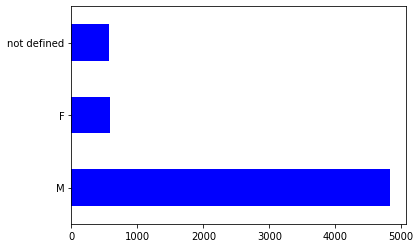

In [22]:
gender = data['Sex'].value_counts() #saca lista total de suma de elementos
gender[gender>2].plot.barh(color='blue')
gender.head(3)
#print("Numero de muertes masculinas y femeninas {}".format(sex_vals[:2]))

shark_unknown                      2934
White shark                         161
Shark involvement not confirmed      80
Tiger shark                          68
Bull shark                           52
Name: Species, dtype: int64

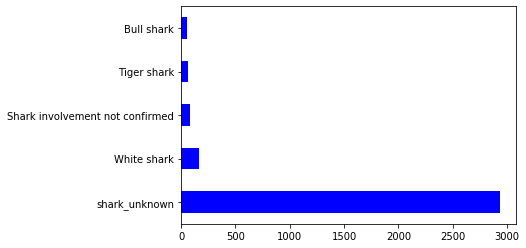

In [23]:
sharks = data['Species'].value_counts() #saca lista total de suma de elementos
sharks[sharks>40].plot.barh(color='blue')
sharks.head(5)

In [24]:
![alt text](shark.png "Title")

"[alt" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [25]:
export_data = data
export_data.to_csv(r'../your-code/output/shark_data.csv')

In [26]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'URL ref', 'Case 1', 'Case 2',
       'original order'],
      dtype='object')